# Preparation

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upload your kaggle.json to colab main directory
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Success'

Success


In [3]:
!kaggle datasets download bilalwaseer/google-stocks-complete
!unzip -o google-stocks-complete.zip
!ls

  0% 0.00/98.3k [00:00<?, ?B/s]
100% 98.3k/98.3k [00:00<00:00, 68.0MB/s]
Archive:  google-stocks-complete.zip
  inflating: GOOGLE.csv              
GOOGLE.csv  google-stocks-complete.zip	sample_data


# Data Exploration

In [4]:
# Looking at the data
df = pd.read_csv('GOOGLE.csv')
df

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...,...
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800


In [5]:
# Getting the info of the data, including null possibility and data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4717 non-null   object 
 1   Open    4717 non-null   float64
 2   High    4717 non-null   float64
 3   Low     4717 non-null   float64
 4   Close   4717 non-null   float64
 5   Volume  4717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [6]:
# Changing the datatype on Date column into datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4717 non-null   datetime64[ns]
 1   Open    4717 non-null   float64       
 2   High    4717 non-null   float64       
 3   Low     4717 non-null   float64       
 4   Close   4717 non-null   float64       
 5   Volume  4717 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 221.2 KB


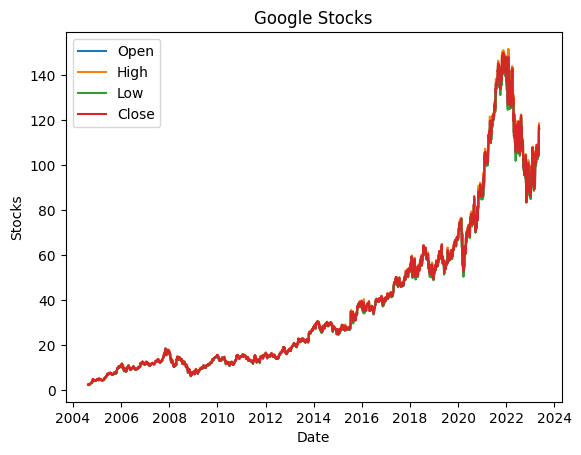

In [7]:
# Visualize the data to get better understanding
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Google Stocks')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

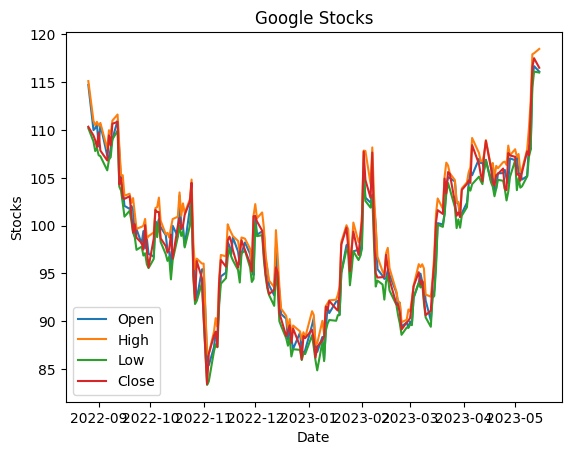

In [8]:
# Visualize the only 6 months
plt.plot(df['Date'][-180:], df['Open'][-180:], label='Open')
plt.plot(df['Date'][-180:], df['High'][-180:], label='High')
plt.plot(df['Date'][-180:], df['Low'][-180:], label='Low')
plt.plot(df['Date'][-180:], df['Close'][-180:], label='Close')
plt.title('Google Stocks')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

# Normalize

In [9]:
# Normalization is required to get better result in forecasting by rescales the value while maintaining the shape of value in the data
# Since we don't need the Date and Volume column, we can get rid off it
data = df.iloc[:, 1:5]
data

,Open,High,Low,Close
0,2.502503,2.604104,2.401401,2.511011
1,2.527778,2.729730,2.515015,2.710460
2,2.771522,2.839840,2.728979,2.737738
3,2.783784,2.792793,2.591842,2.624374
4,2.626627,2.702703,2.599600,2.652653
...,...,...,...,...
4712,108.389999,110.150002,107.190002,107.349998
4713,107.970001,112.940002,107.930000,111.750000
4714,115.400002,117.919998,114.410004,116.570000
4715,116.680000,118.029999,116.110001,117.510002


In [10]:
# Normalize the data using Standard Scaler algorithm
scaler = StandardScaler()
scaler = scaler.fit(data)
data_normalized = scaler.transform(data)

In [11]:
# Check the normalized data
df_data_normalized = pd.DataFrame(data_normalized, columns=['Open', 'High', 'Low', 'Close'])
df_data_normalized

,Open,High,Low,Close
0,-1.021605,-1.018652,-1.024296,-1.021211
1,-1.020897,-1.015172,-1.021077,-1.015624
2,-1.014067,-1.012121,-1.015014,-1.014860
3,-1.013723,-1.013424,-1.018900,-1.018036
4,-1.018127,-1.015920,-1.018680,-1.017244
...,...,...,...,...
4712,1.945494,1.961297,1.945107,1.915541
4713,1.933725,2.038604,1.966076,2.038794
4714,2.141923,2.176593,2.149701,2.173812
4715,2.177790,2.179641,2.197874,2.200144


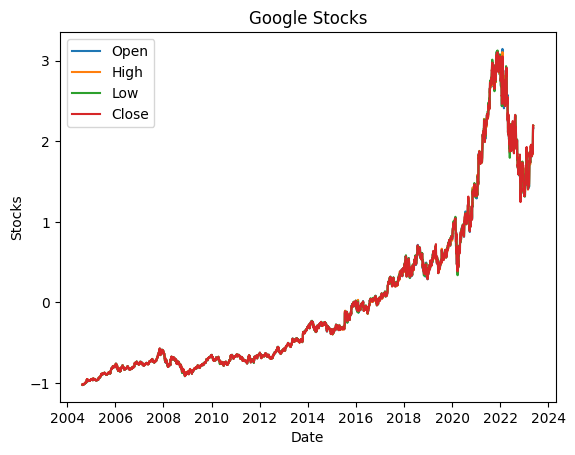

In [12]:
# Visualize the normalized data
plt.plot(df['Date'], df_data_normalized['Open'], label='Open')
plt.plot(df['Date'], df_data_normalized['High'], label='High')
plt.plot(df['Date'], df_data_normalized['Low'], label='Low')
plt.plot(df['Date'], df_data_normalized['Close'], label='Close')
plt.title('Google Stocks')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

# Split X & Y

In [13]:
# Split the data into data_x and data_y as sequence of data used and it's label value respectively
n_past = 30 # also called as window_size
n_future = 1

data_x = []
data_y = []
df_y = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

for i in range(len(df_data_normalized)-n_past):
    x = df_data_normalized[i:i+n_past]
    y = df_data_normalized[i+n_past:i+n_past+n_future]
    data_x.append(x)
    data_y.append(y)
    df_y = pd.concat([df_y, y])

data_x, data_y = np.array(data_x), np.array(data_y)
data_x, data_y = np.swapaxes(data_x, 1, 2), np.swapaxes(data_y, 1, 2)

In [14]:
# df_y is used as visualization purpose of y data
df_y.set_index(df['Date'][30:])
df_y

,Open,High,Low,Close
30,-1.000007,-0.997725,-1.000937,-0.998611
31,-0.996887,-0.995902,-0.997299,-0.996873
32,-0.997300,-0.994751,-0.998569,-0.994552
33,-0.995274,-0.994806,-0.995902,-0.995457
34,-0.995716,-0.993814,-0.995512,-0.994216
...,...,...,...,...
4712,1.945494,1.961297,1.945107,1.915541
4713,1.933725,2.038604,1.966076,2.038794
4714,2.141923,2.176593,2.149701,2.173812
4715,2.177790,2.179641,2.197874,2.200144


# Split Training, Validation, & Testing

In [15]:
# Split the data into training, validation, and testing set with the ratio of 0.90 : 0.5 : 0.5
split_point_1 = int(0.90*len(data_x))
split_point_2 = int(0.95*len(data_x))

train_x, train_y = data_x[:split_point_1], data_y[:split_point_1]
valid_x, valid_y = data_x[split_point_1:split_point_2], data_y[split_point_1:split_point_2]
test_x, test_y = data_x[split_point_2:], data_y[split_point_2:]

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(4218, 4, 30)
(234, 4, 30)
(235, 4, 30)


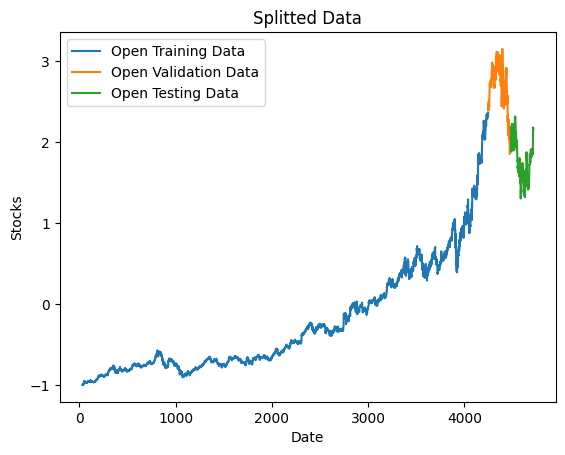

In [16]:
# Visualize the each parts of splitted data set
plt.plot(df_y['Open'][:split_point_1], label='Open Training Data')
plt.plot(df_y['Open'][split_point_1:split_point_2], label='Open Validation Data')
plt.plot(df_y['Open'][split_point_2:], label='Open Testing Data')
plt.title('Splitted Data')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

In [17]:
# Define the input and output shape based on data set
input_shape = (train_x.shape[1], train_x.shape[2])
output_shape = train_y.shape[2]

print(input_shape)
print(output_shape)

(4, 30)
1


# Forecast Training & Predicting - Linear Model

In [18]:
# Architecture of linear model, using 5 linear layers
linear_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(output_shape)
])

linear_model.compile(optimizer='adam', loss='mse')
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4, 64)             1984      
                                                                 
 dense_1 (Dense)             (None, 4, 32)             2080      
                                                                 
 dense_2 (Dense)             (None, 4, 128)            4224      
                                                                 
 dense_3 (Dense)             (None, 4, 16)             2064      
                                                                 
 dense_4 (Dense)             (None, 4, 1)              17        
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
4218/4218 [==============================] - 11s 2ms/step - loss: 0.0089 - val_loss: 0.0830
Epoch 2/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0052 - val_loss: 0.0579
Epoch 3/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0029 - val_loss: 0.0150
Epoch 4/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0027 - val_loss: 0.0196
Epoch 5/50
4218/4218 [==============================] - 10s 2ms/step - loss: 0.0023 - val_loss: 0.0410
Epoch 6/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0020 - val_loss: 0.0410
Epoch 7/50
4218/4218 [==============================] - 8s 2ms/step - loss: 0.0017 - val_loss: 0.0493
Epoch 8/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0017 - val_loss: 0.0290
Epoch 9/50
4218/4218 [==============================] - 9s 2ms/step - loss: 0.0016 - val_loss: 0.0129
Epoch 10/50
4218/4218 [==============================] - 8s 2ms/step - loss: 0.0

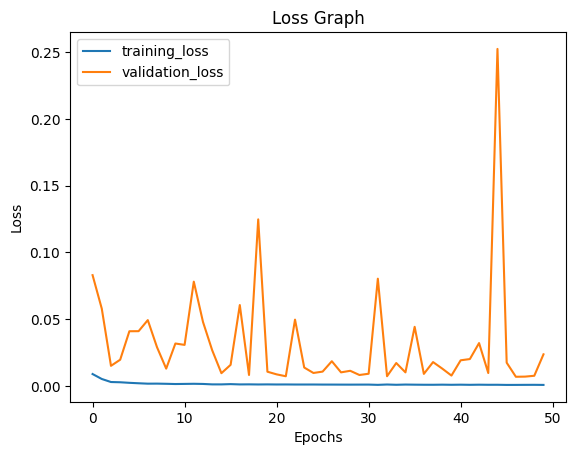

In [19]:
# Load the model and history results if it detected in the system, or
# Train the data and save the model and history result if there is no file detected,
# Then vizualize the history result of training and validation loss each Epochs

if os.path.exists('linear_model.h5') and os.path.exists('linear_history.npy'):
    linear_model = tf.keras.models.load_model('linear_model.h5')
    hist = np.load('linear_history.npy',allow_pickle='TRUE').item()
else:
    history = linear_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=1, verbose=1)
    hist = history.history
    linear_model.save('linear_model.h5')
    np.save('linear_history.npy',history.history)

plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_loss'], label='validation_loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Forecasting all data in each data set

forecast = []

for x_data, x_label in [[train_x, 'training'], [valid_x, 'validation'], [test_x, 'testing']]:
    print('predicting ', x_label, ' data:')
    for time in range(len(x_data)):
        forecast.append(linear_model.predict(x_data[time:time+1], verbose=0))
        if time > 0 and time % 100 == 0:
            print('Predicting: ', str(time), '/', str(len(x_data)))
    print('Predicting ', x_label, ' data finished: ', str(len(x_data)), '/', str(len(x_data)), '\n')

forecast = np.squeeze(np.array(forecast), axis=1)
print('Predicting all data finished: ', str(len(train_x)+len(valid_x)+len(test_x)), '/', str(len(train_x)+len(valid_x)+len(test_x)))

predicting  training  data:
Predicting:  100 / 4218
Predicting:  200 / 4218
Predicting:  300 / 4218
Predicting:  400 / 4218
Predicting:  500 / 4218
Predicting:  600 / 4218
Predicting:  700 / 4218
Predicting:  800 / 4218
Predicting:  900 / 4218
Predicting:  1000 / 4218
Predicting:  1100 / 4218
Predicting:  1200 / 4218
Predicting:  1300 / 4218
Predicting:  1400 / 4218
Predicting:  1500 / 4218
Predicting:  1600 / 4218
Predicting:  1700 / 4218
Predicting:  1800 / 4218
Predicting:  1900 / 4218
Predicting:  2000 / 4218
Predicting:  2100 / 4218
Predicting:  2200 / 4218
Predicting:  2300 / 4218
Predicting:  2400 / 4218
Predicting:  2500 / 4218
Predicting:  2600 / 4218
Predicting:  2700 / 4218
Predicting:  2800 / 4218
Predicting:  2900 / 4218
Predicting:  3000 / 4218
Predicting:  3100 / 4218
Predicting:  3200 / 4218
Predicting:  3300 / 4218
Predicting:  3400 / 4218
Predicting:  3500 / 4218
Predicting:  3600 / 4218
Predicting:  3700 / 4218
Predicting:  3800 / 4218
Predicting:  3900 / 4218
Predic

# Forecast Result - Linear Model

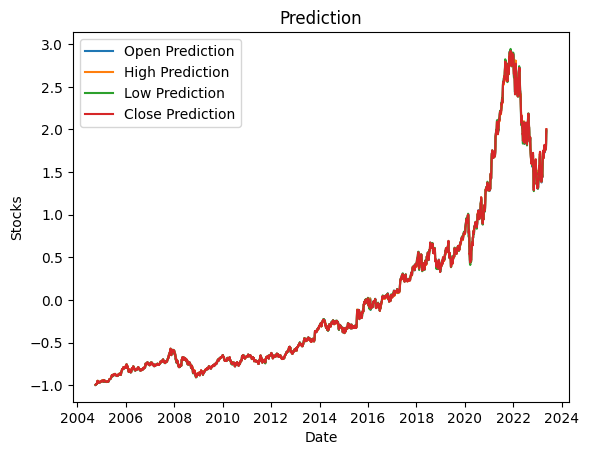

In [21]:
# Visualize the prediction result in all mixed datasets for each type of columns
plt.plot(df['Date'][30:], forecast[:,0,0], label='Open Prediction')
plt.plot(df['Date'][30:], forecast[:,1,0], label='High Prediction')
plt.plot(df['Date'][30:], forecast[:,2,0], label='Low Prediction')
plt.plot(df['Date'][30:], forecast[:,3,0], label='Close Prediction')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

In [22]:
# Inverse the normalization to get actual forecasting value
normal_forecast = scaler.inverse_transform(np.squeeze(forecast, axis=2))
normal_y_data = scaler.inverse_transform(np.squeeze(data_y, axis=2))

df_forecast = pd.DataFrame(normal_forecast, columns=['Open', 'High', 'Low', 'Close'])
df_y_data = pd.DataFrame(normal_y_data, columns=['Open', 'High', 'Low', 'Close'])

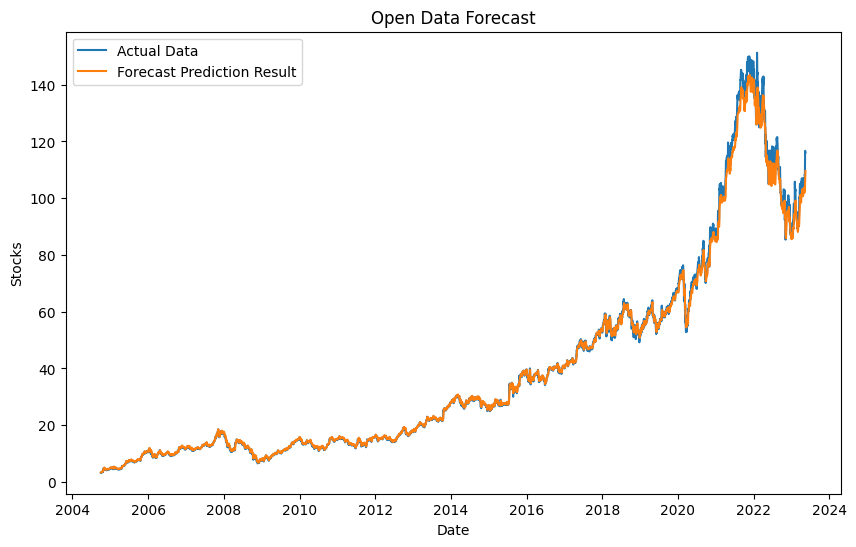

MAE value: 
Open MAE:  0.8767897
High MAE:  0.8564883
Low MAE:  0.85922277
Close MAE:  0.88154113


In [23]:
# Visualize the comparison between actual data and forecast result for open column, and then get the MAE value for each columns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][30:], df_y_data['Open'], label='Actual Data')
plt.plot(df['Date'][30:], df_forecast['Open'], label='Forecast Prediction Result')
plt.title('Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,0], normal_forecast[:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,1], normal_forecast[:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,2], normal_forecast[:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,3], normal_forecast[:,3]).numpy())

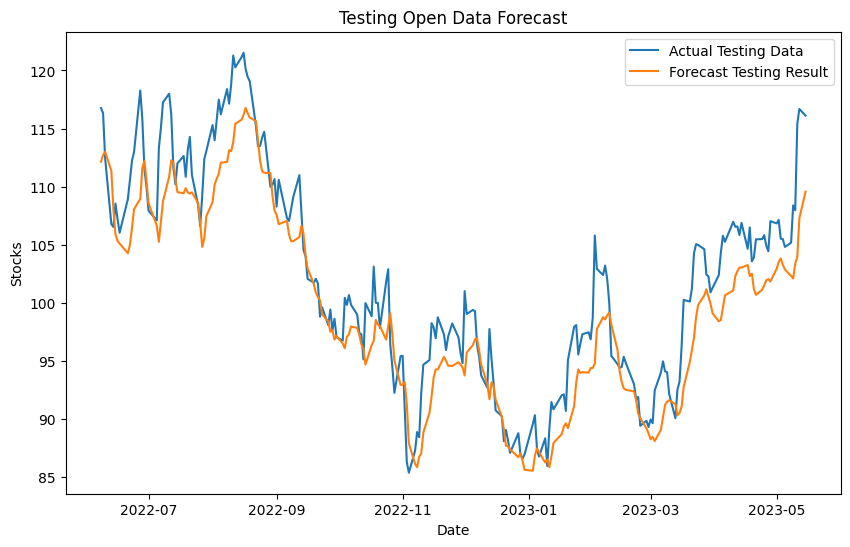

MAE Testing value: 
Open MAE:  3.0395312
High MAE:  3.130328
Low MAE:  2.9938555
Close MAE:  3.173985


In [24]:
# Visualize and print MAE value just like before, but for test data only
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][split_point_2+30:], df_y_data['Open'][split_point_2:], label='Actual Testing Data')
plt.plot(df['Date'][split_point_2+30:], df_forecast['Open'][split_point_2:], label='Forecast Testing Result')
plt.title('Testing Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE Testing value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,0], normal_forecast[split_point_2:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,1], normal_forecast[split_point_2:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,2], normal_forecast[split_point_2:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,3], normal_forecast[split_point_2:,3]).numpy())

# Forecast Training & Predicting - RNN Model

In [42]:
# Architecture of RNN model, using 2 RNN layers and 3 linear layers
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=input_shape, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(output_shape)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, 4, 64)             6080      
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 4, 32)             3104      
                                                                 
 dense_32 (Dense)            (None, 4, 128)            4224      
                                                                 
 dense_33 (Dense)            (None, 4, 16)             2064      
                                                                 
 dense_34 (Dense)            (None, 4, 1)              17        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
4218/4218 [==============================] - 26s 5ms/step - loss: 0.0079 - val_loss: 0.0366
Epoch 2/50
4218/4218 [==============================] - 18s 4ms/step - loss: 0.0035 - val_loss: 0.0463
Epoch 3/50
4218/4218 [==============================] - 19s 4ms/step - loss: 0.0035 - val_loss: 0.0338
Epoch 4/50
4218/4218 [==============================] - 18s 4ms/step - loss: 0.0029 - val_loss: 0.0158
Epoch 5/50
4218/4218 [==============================] - 18s 4ms/step - loss: 0.0020 - val_loss: 0.0338
Epoch 6/50
4218/4218 [==============================] - 19s 4ms/step - loss: 0.0022 - val_loss: 0.0153
Epoch 7/50
4218/4218 [==============================] - 17s 4ms/step - loss: 0.0017 - val_loss: 0.0119
Epoch 8/50
4218/4218 [==============================] - 20s 5ms/step - loss: 0.0016 - val_loss: 0.0145
Epoch 9/50
4218/4218 [==============================] - 19s 4ms/step - loss: 0.0020 - val_loss: 0.0301
Epoch 10/50
4218/4218 [==============================] - 19s 5ms/step - l

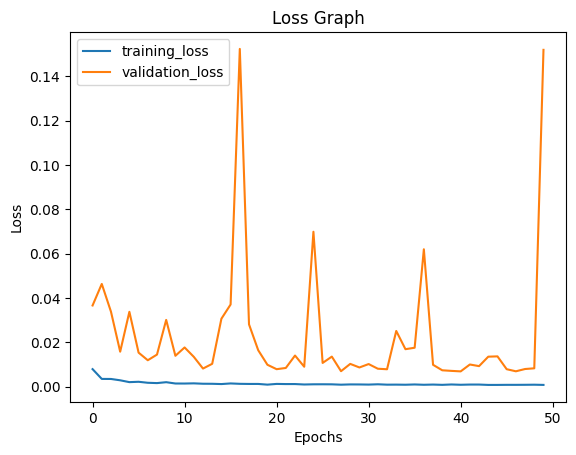

In [43]:
# Load the model and history results if it detected in the system, or
# Train the data and save the model and history result if there is no file detected,
# Then vizualize the history result of training and validation loss each Epochs

if os.path.exists('rnn_model.h5') and os.path.exists('rnn_history.npy'):
    rnn_model = tf.keras.models.load_model('rnn_model.h5')
    hist = np.load('rnn_history.npy',allow_pickle='TRUE').item()
else:
    history = rnn_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=1, verbose=1)
    hist = history.history
    rnn_model.save('rnn_model.h5')
    np.save('rnn_history.npy',history.history)

plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_loss'], label='validation_loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Forecasting all data in each data set

forecast = []

for x_data, x_label in [[train_x, 'training'], [valid_x, 'validation'], [test_x, 'testing']]:
    print('predicting ', x_label, ' data:')
    for time in range(len(x_data)):
        forecast.append(rnn_model.predict(x_data[time:time+1], verbose=0))
        if time > 0 and time % 100 == 0:
            print('Predicting: ', str(time), '/', str(len(x_data)))
    print('Predicting ', x_label, ' data finished: ', str(len(x_data)), '/', str(len(x_data)), '\n')

forecast = np.squeeze(np.array(forecast), axis=1)
print('Predicting all data finished: ', str(len(train_x)+len(valid_x)+len(test_x)), '/', str(len(train_x)+len(valid_x)+len(test_x)))

predicting  training  data:
Predicting:  100 / 4218
Predicting:  200 / 4218
Predicting:  300 / 4218
Predicting:  400 / 4218
Predicting:  500 / 4218
Predicting:  600 / 4218
Predicting:  700 / 4218
Predicting:  800 / 4218
Predicting:  900 / 4218
Predicting:  1000 / 4218
Predicting:  1100 / 4218
Predicting:  1200 / 4218
Predicting:  1300 / 4218
Predicting:  1400 / 4218
Predicting:  1500 / 4218
Predicting:  1600 / 4218
Predicting:  1700 / 4218
Predicting:  1800 / 4218
Predicting:  1900 / 4218
Predicting:  2000 / 4218
Predicting:  2100 / 4218
Predicting:  2200 / 4218
Predicting:  2300 / 4218
Predicting:  2400 / 4218
Predicting:  2500 / 4218
Predicting:  2600 / 4218
Predicting:  2700 / 4218
Predicting:  2800 / 4218
Predicting:  2900 / 4218
Predicting:  3000 / 4218
Predicting:  3100 / 4218
Predicting:  3200 / 4218
Predicting:  3300 / 4218
Predicting:  3400 / 4218
Predicting:  3500 / 4218
Predicting:  3600 / 4218
Predicting:  3700 / 4218
Predicting:  3800 / 4218
Predicting:  3900 / 4218
Predic

# Forecast Result - RNN Model

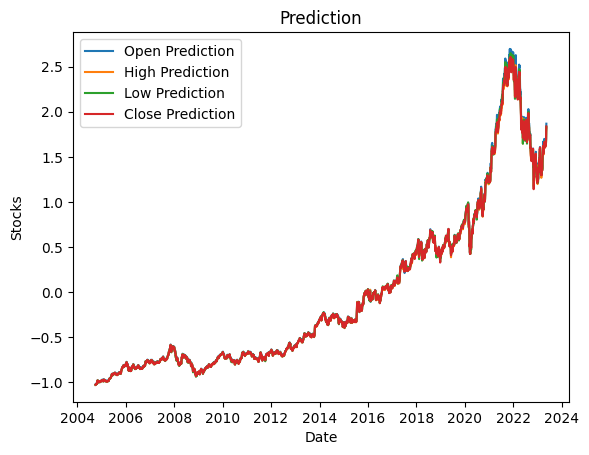

In [46]:
# Visualize the prediction result in all mixed datasets for each type of columns
plt.plot(df['Date'][30:], forecast[:,0,0], label='Open Prediction')
plt.plot(df['Date'][30:], forecast[:,1,0], label='High Prediction')
plt.plot(df['Date'][30:], forecast[:,2,0], label='Low Prediction')
plt.plot(df['Date'][30:], forecast[:,3,0], label='Close Prediction')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

In [47]:
# Inverse the normalization to get actual forecasting value
normal_forecast = scaler.inverse_transform(np.squeeze(forecast, axis=2))
normal_y_data = scaler.inverse_transform(np.squeeze(data_y, axis=2))

df_forecast = pd.DataFrame(normal_forecast, columns=['Open', 'High', 'Low', 'Close'])
df_y_data = pd.DataFrame(normal_y_data, columns=['Open', 'High', 'Low', 'Close'])

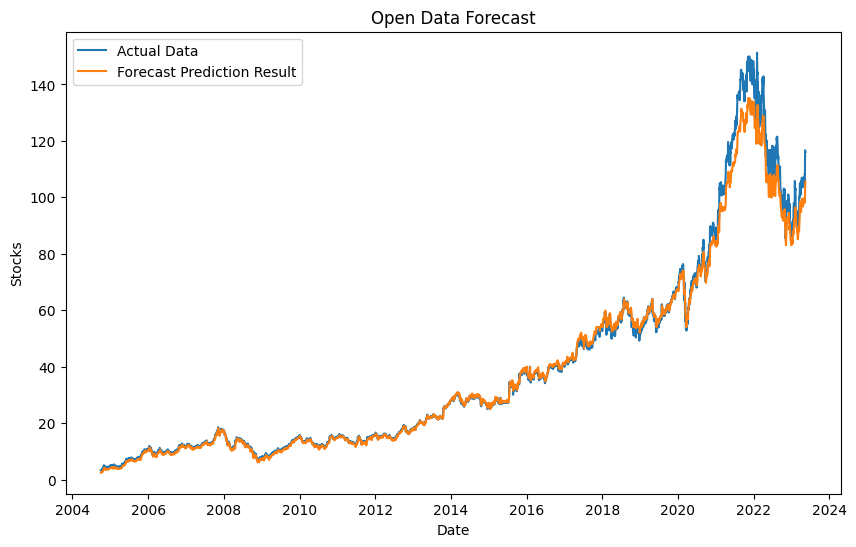

MAE value: 
Open MAE:  1.6928538
High MAE:  2.0457313
Low MAE:  1.9207776
Close MAE:  1.9896816


In [48]:
# Visualize the comparison between actual data and forecast result for open column, and then get the MAE value for each columns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][30:], df_y_data['Open'], label='Actual Data')
plt.plot(df['Date'][30:], df_forecast['Open'], label='Forecast Prediction Result')
plt.title('Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,0], normal_forecast[:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,1], normal_forecast[:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,2], normal_forecast[:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,3], normal_forecast[:,3]).numpy())

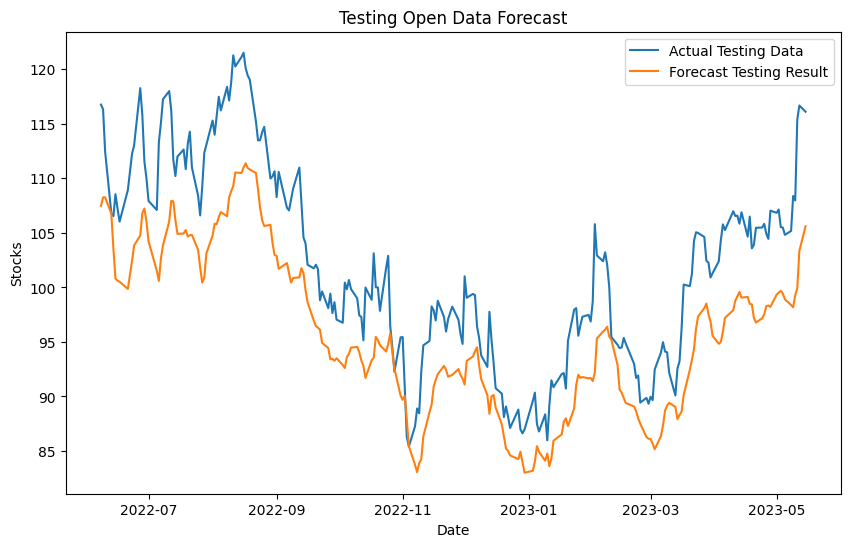

MAE Testing value: 
Open MAE:  6.1755657
High MAE:  7.828939
Low MAE:  7.2316346
Close MAE:  7.4952927


In [49]:
# Visualize and print MAE value just like before, but for test data only
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][split_point_2+30:], df_y_data['Open'][split_point_2:], label='Actual Testing Data')
plt.plot(df['Date'][split_point_2+30:], df_forecast['Open'][split_point_2:], label='Forecast Testing Result')
plt.title('Testing Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE Testing value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,0], normal_forecast[split_point_2:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,1], normal_forecast[split_point_2:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,2], normal_forecast[split_point_2:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,3], normal_forecast[split_point_2:,3]).numpy())

# Forecast Training & Predicting - LSTM Model

In [50]:
# Architecture of RNN model, using 2 LSTM layers and 3 linear layers
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(output_shape)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 64)             24320     
                                                                 
 lstm_1 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dense_35 (Dense)            (None, 4, 128)            4224      
                                                                 
 dense_36 (Dense)            (None, 4, 16)             2064      
                                                                 
 dense_37 (Dense)            (None, 4, 1)              17        
                                                                 
Total params: 43,041
Trainable params: 43,041
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
4218/4218 [==============================] - 26s 5ms/step - loss: 0.0185 - val_loss: 0.1668
Epoch 2/50
4218/4218 [==============================] - 23s 6ms/step - loss: 0.0052 - val_loss: 0.0209
Epoch 3/50
4218/4218 [==============================] - 23s 6ms/step - loss: 0.0029 - val_loss: 0.1164
Epoch 4/50
4218/4218 [==============================] - 23s 5ms/step - loss: 0.0031 - val_loss: 0.0412
Epoch 5/50
4218/4218 [==============================] - 23s 5ms/step - loss: 0.0021 - val_loss: 0.0522
Epoch 6/50
4218/4218 [==============================] - 22s 5ms/step - loss: 0.0018 - val_loss: 0.0275
Epoch 7/50
4218/4218 [==============================] - 25s 6ms/step - loss: 0.0019 - val_loss: 0.1484
Epoch 8/50
4218/4218 [==============================] - 23s 5ms/step - loss: 0.0016 - val_loss: 0.0196
Epoch 9/50
4218/4218 [==============================] - 23s 5ms/step - loss: 0.0018 - val_loss: 0.0410
Epoch 10/50
4218/4218 [==============================] - 21s 5ms/step - l

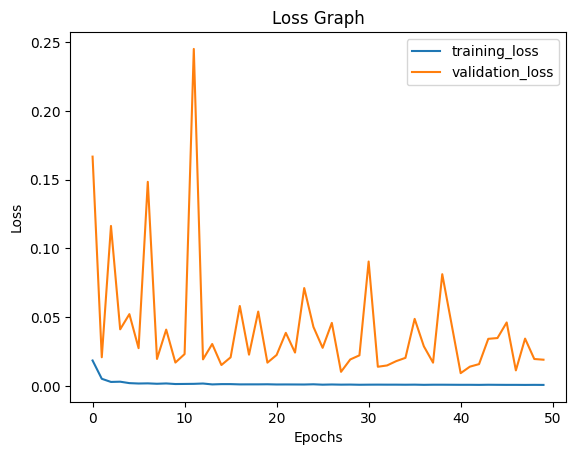

In [51]:
# Load the model and history results if it detected in the system, or
# Train the data and save the model and history result if there is no file detected,
# Then vizualize the history result of training and validation loss each Epochs

if os.path.exists('lstm_model.h5') and os.path.exists('lstm_history.npy'):
    lstm_model = tf.keras.models.load_model('lstm_model.h5')
    hist = np.load('lstm_history.npy',allow_pickle='TRUE').item()
else:
    history = lstm_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=1, verbose=1)
    hist = history.history
    lstm_model.save('lstm_model.h5')
    np.save('lstm_history.npy',history.history)

plt.plot(hist['loss'], label='training_loss')
plt.plot(hist['val_loss'], label='validation_loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
# Forecasting all data in each data set

forecast = []

for x_data, x_label in [[train_x, 'training'], [valid_x, 'validation'], [test_x, 'testing']]:
    print('predicting ', x_label, ' data:')
    for time in range(len(x_data)):
        forecast.append(lstm_model.predict(x_data[time:time+1], verbose=0))
        if time > 0 and time % 100 == 0:
            print('Predicting: ', str(time), '/', str(len(x_data)))
    print('Predicting ', x_label, ' data finished: ', str(len(x_data)), '/', str(len(x_data)), '\n')

forecast = np.squeeze(np.array(forecast), axis=1)
print('Predicting all data finished: ', str(len(train_x)+len(valid_x)+len(test_x)), '/', str(len(train_x)+len(valid_x)+len(test_x)))

predicting  training  data:
Predicting:  100 / 4218
Predicting:  200 / 4218
Predicting:  300 / 4218
Predicting:  400 / 4218
Predicting:  500 / 4218
Predicting:  600 / 4218
Predicting:  700 / 4218
Predicting:  800 / 4218
Predicting:  900 / 4218
Predicting:  1000 / 4218
Predicting:  1100 / 4218
Predicting:  1200 / 4218
Predicting:  1300 / 4218
Predicting:  1400 / 4218
Predicting:  1500 / 4218
Predicting:  1600 / 4218
Predicting:  1700 / 4218
Predicting:  1800 / 4218
Predicting:  1900 / 4218
Predicting:  2000 / 4218
Predicting:  2100 / 4218
Predicting:  2200 / 4218
Predicting:  2300 / 4218
Predicting:  2400 / 4218
Predicting:  2500 / 4218
Predicting:  2600 / 4218
Predicting:  2700 / 4218
Predicting:  2800 / 4218
Predicting:  2900 / 4218
Predicting:  3000 / 4218
Predicting:  3100 / 4218
Predicting:  3200 / 4218
Predicting:  3300 / 4218
Predicting:  3400 / 4218
Predicting:  3500 / 4218
Predicting:  3600 / 4218
Predicting:  3700 / 4218
Predicting:  3800 / 4218
Predicting:  3900 / 4218
Predic

# Forecast Result - LSTM Model

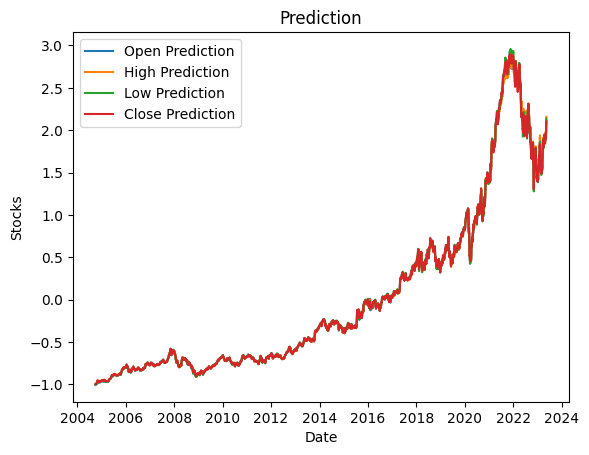

In [53]:
# Visualize the prediction result in all mixed datasets for each type of columns

plt.plot(df['Date'][30:], forecast[:,0,0], label='Open Prediction')
plt.plot(df['Date'][30:], forecast[:,1,0], label='High Prediction')
plt.plot(df['Date'][30:], forecast[:,2,0], label='Low Prediction')
plt.plot(df['Date'][30:], forecast[:,3,0], label='Close Prediction')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

In [54]:
# Inverse the normalization to get actual forecasting value
normal_forecast = scaler.inverse_transform(np.squeeze(forecast, axis=2))
normal_y_data = scaler.inverse_transform(np.squeeze(data_y, axis=2))

df_forecast = pd.DataFrame(normal_forecast, columns=['Open', 'High', 'Low', 'Close'])
df_y_data = pd.DataFrame(normal_y_data, columns=['Open', 'High', 'Low', 'Close'])

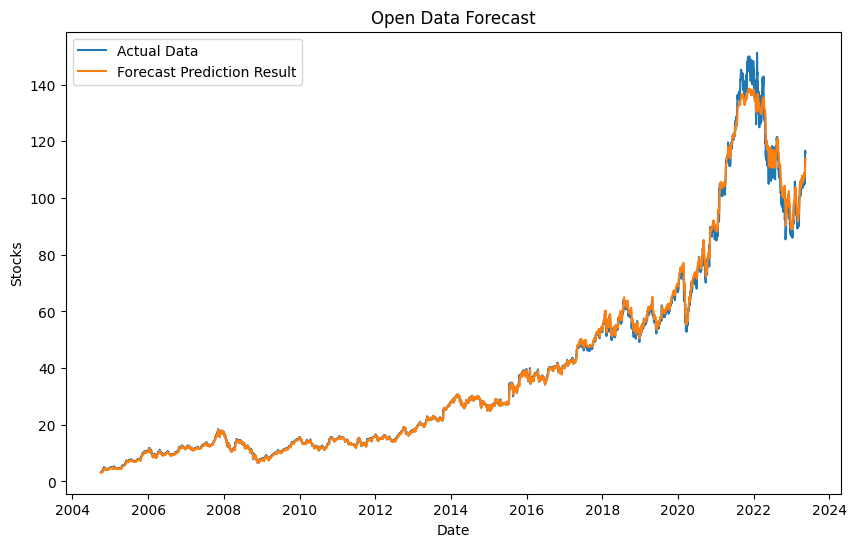

MAE value: 
Open MAE:  0.82377446
High MAE:  0.784699
Low MAE:  0.65756977
Close MAE:  0.71944726


In [55]:
# Visualize the comparison between actual data and forecast result for open column, and then get the MAE value for each columns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][30:], df_y_data['Open'], label='Actual Data')
plt.plot(df['Date'][30:], df_forecast['Open'], label='Forecast Prediction Result')
plt.title('Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,0], normal_forecast[:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,1], normal_forecast[:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,2], normal_forecast[:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[:,3], normal_forecast[:,3]).numpy())

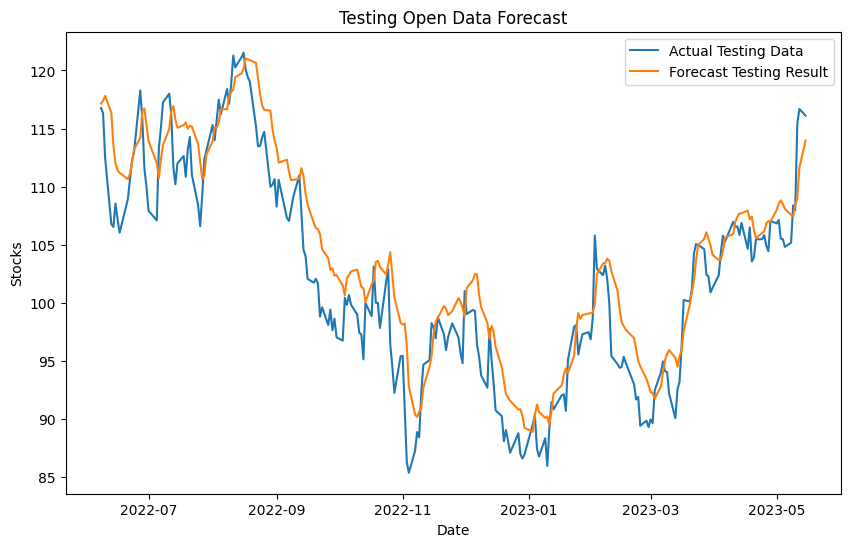

MAE value: 
Open MAE:  2.920172
High MAE:  2.888127
Low MAE:  2.2732298
Close MAE:  2.5356014


In [56]:
# Visualize and print MAE value just like before, but for test data only
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][split_point_2+30:], df_y_data['Open'][split_point_2:], label='Actual Testing Data')
plt.plot(df['Date'][split_point_2+30:], df_forecast['Open'][split_point_2:], label='Forecast Testing Result')
plt.title('Testing Open Data Forecast')
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.legend()
plt.show()

print('MAE value: ')
print('Open MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,0], normal_forecast[split_point_2:,0]).numpy())
print('High MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,1], normal_forecast[split_point_2:,1]).numpy())
print('Low MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,2], normal_forecast[split_point_2:,2]).numpy())
print('Close MAE: ', tf.keras.metrics.mean_absolute_error(normal_y_data[split_point_2:,3], normal_forecast[split_point_2:,3]).numpy())